In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Loading

In [17]:
df = pd.read_csv('/content/drive/MyDrive/Project68/Intern/Customers.csv',header=0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2005 entries, 0 to 2004
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2005 non-null   int64 
 1   Gender                  2005 non-null   object
 2   Age                     2005 non-null   int64 
 3   Annual Income ($)       2005 non-null   int64 
 4   Spending Score (1-100)  2005 non-null   int64 
 5   Profession              1970 non-null   object
 6   Work Experience         2005 non-null   int64 
 7   Family Size             2005 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.4+ KB


In [ ]:
df.head(10)
#df.tail(10)

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
5,6,Female,22,58000,76,Artist,0,2
6,7,Female,35,31000,6,Healthcare,1,3
7,8,Female,23,84000,94,Healthcare,1,3
8,9,Male,64,97000,3,Engineer,0,3
9,10,Female,30,98000,72,Artist,1,4


In [ ]:
df.shape

(2005, 8)

## Data Quality Checking & Data Cleansing

In [22]:
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64


In [23]:
#show only row that have missing values
df[df.isnull().any(axis=1)]

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
79,80,Female,49,98000,42,NaN,1,1
118,119,Female,51,84000,43,NaN,2,7
219,220,Female,59,76000,61,NaN,9,1
237,238,Male,95,36000,35,NaN,0,4
437,438,Male,76,136259,14,NaN,0,7
440,441,Female,0,57373,29,NaN,0,7
498,499,Male,95,121725,3,NaN,12,3
545,546,Female,89,107359,26,NaN,10,6
601,602,Male,61,126370,20,NaN,11,4
641,642,Male,66,121377,19,NaN,7,7


In [24]:
#show duplicated values
df[df.duplicated(keep=False)].sort_values(by='CustomerID')

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
7,8,Female,23,84000,94,Healthcare,1,3
2004,8,Female,23,84000,94,Healthcare,1,3
497,498,Male,12,84547,96,Homemaker,3,3
2003,498,Male,12,84547,96,Homemaker,3,3
669,670,Female,23,144916,84,Engineer,1,7
2000,670,Female,23,144916,84,Engineer,1,7
1683,1684,Female,83,142720,86,Executive,0,1
2001,1684,Female,83,142720,86,Executive,0,1
1712,1713,Male,33,76654,48,Artist,4,1
2002,1713,Male,33,76654,48,Artist,4,1


In [26]:
#drop duplicated rows
df.drop_duplicates(inplace=True)

In [30]:
df.dtypes

,0
CustomerID,int64
Gender,object
Age,int64
Annual Income ($),int64
Spending Score (1-100),int64
Profession,object
Work Experience,int64
Family Size,int64


## Stat Checking

In [31]:
df.describe()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,48.960000,110731.821500,50.962500,4.102500,3.768500
std,577.494589,28.429747,45739.536688,27.934661,3.922204,1.970749
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,500.750000,25.000000,74572.000000,28.000000,1.000000,2.000000
50%,1000.500000,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,1500.250000,73.000000,149092.750000,75.000000,7.000000,5.000000
max,2000.000000,99.000000,189974.000000,100.000000,17.000000,9.000000


In [34]:
df[['Age','Annual Income ($)','Work Experience','Spending Score (1-100)','Family Size']].median()

,0
Age,48.0
Annual Income ($),110045.0
Work Experience,3.0
Spending Score (1-100),50.0
Family Size,4.0


In [35]:
df[['Age','Annual Income ($)','Work Experience','Spending Score (1-100)','Family Size']].mode()

,Age,Annual Income ($),Work Experience,Spending Score (1-100),Family Size
0,31.0,9000,1.0,49.0,2.0
1,NaN,50000,NaN,NaN,NaN


In [32]:
df.describe(include=['object'])

,Gender,Profession
count,2000,1965
unique,2,9
top,Female,Artist
freq,1186,612


## Distribution Checking

#### Histogram Plot

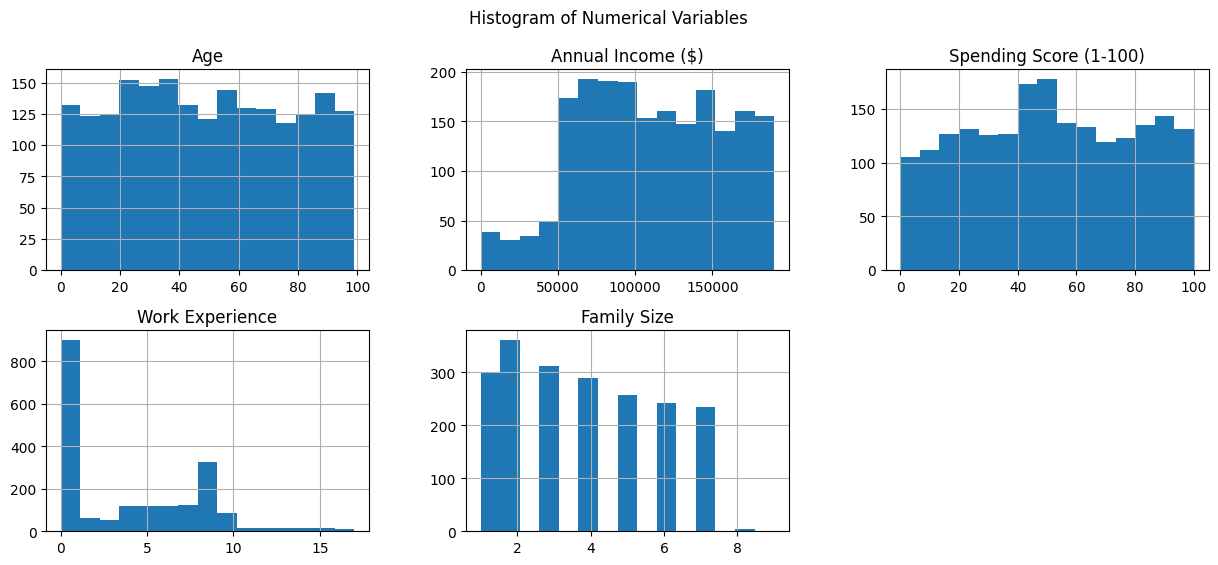

In [36]:
cols = ['Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Work Experience', 'Family Size']
df[cols].hist(bins=15, figsize=(15, 6), layout=(2, 3))
plt.suptitle('Distribution of Numerical Variables')
plt.show()

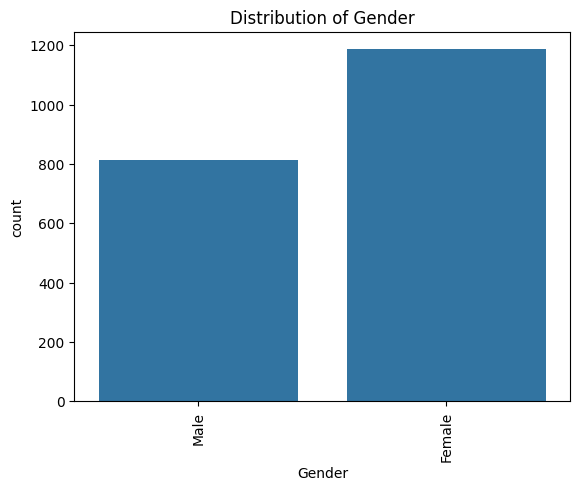

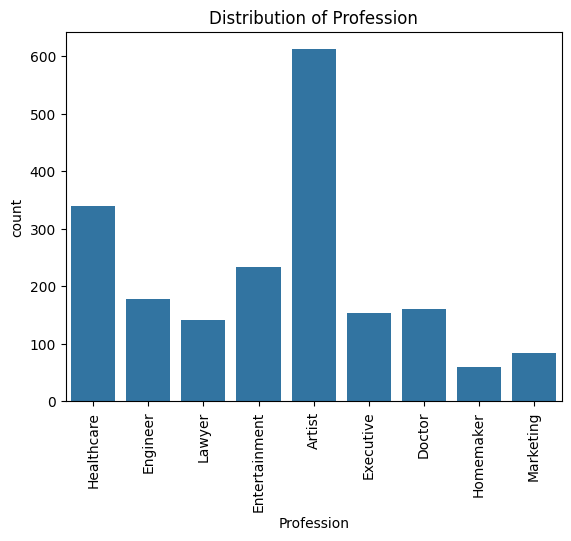

In [37]:
# Category columns
cat_cols = ['Gender', 'Profession']

for col in cat_cols:
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=90)
    plt.show()

#### KDE plot

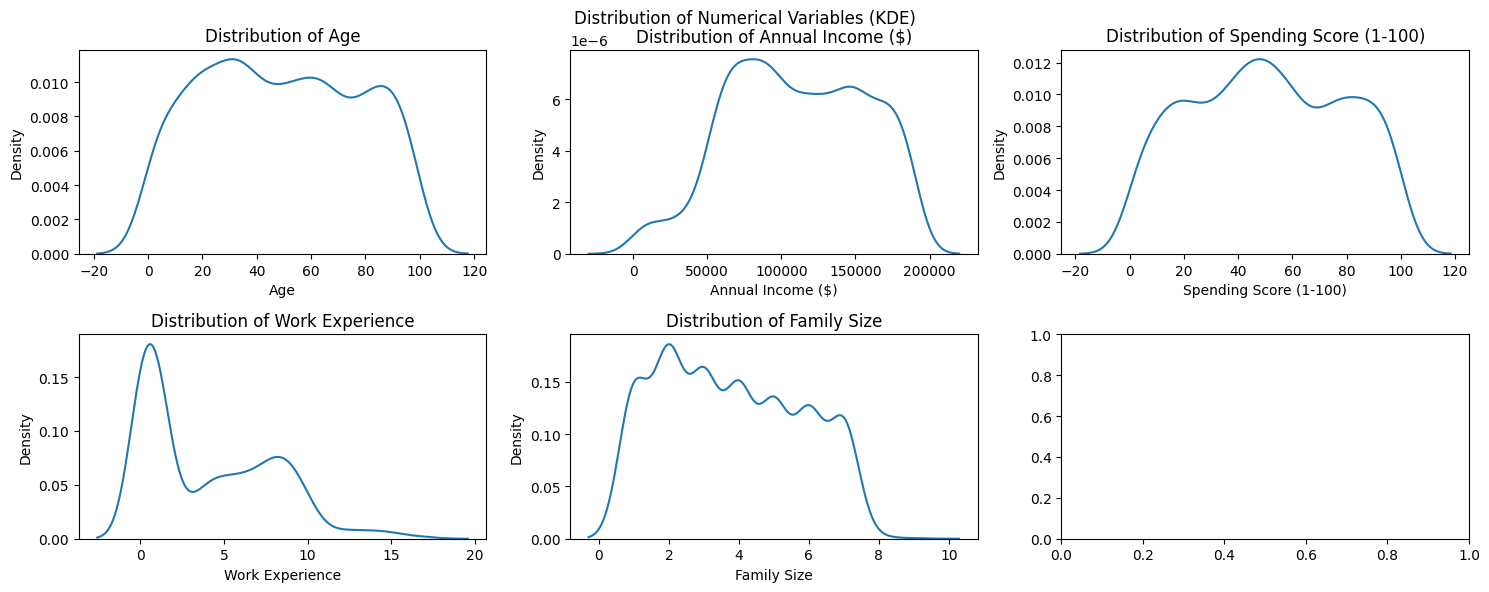

In [40]:
fig, axes = plt.subplots(2, 3, figsize=(15, 6))  # 2 rows, 3 columns for subplots
axes = axes.flatten()  # Flatten the axes array for easier iteration

for i, col in enumerate(cols):
    sns.kdeplot(data=df, x=col, ax=axes[i])  # Use kdeplot for KDE plots
    axes[i].set_title(f'Distribution of {col}')  # Set title for each subplot

plt.tight_layout()  # Adjust layout for better spacing
plt.suptitle('Distribution of Numerical Variables (KDE)')  # Set main title
plt.show()

## Relationship Checking

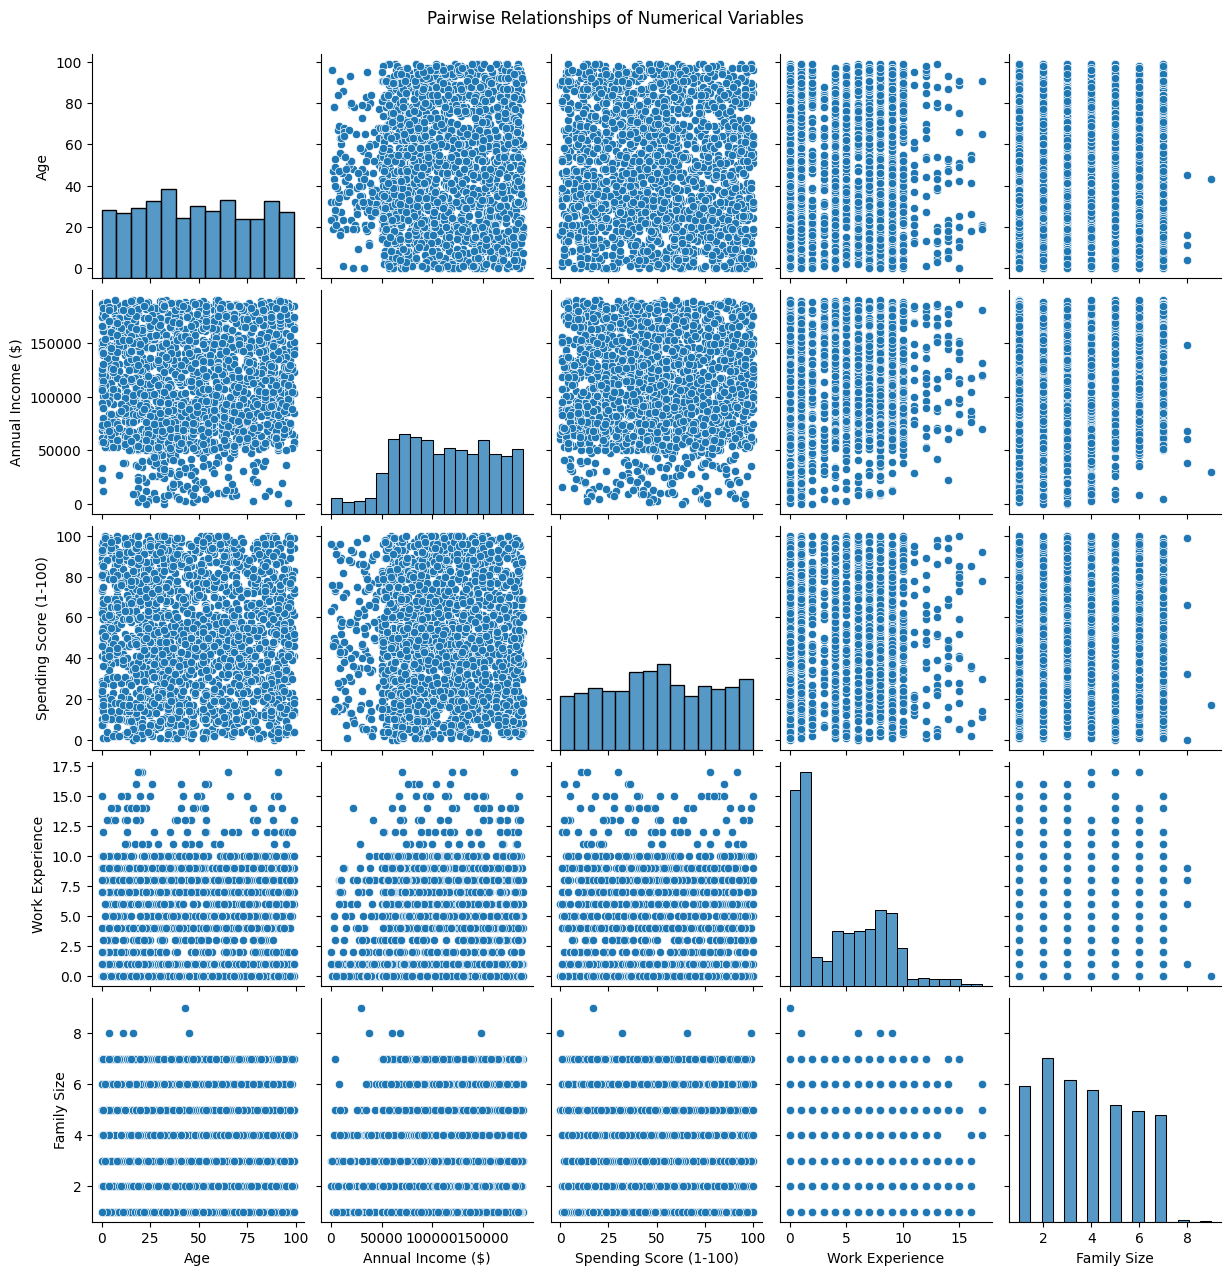

In [44]:
cols = ['Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Work Experience', 'Family Size']

sns.pairplot(df[cols])
plt.suptitle('Pairwise Relationships of Numerical Variables', y=1.02)
plt.show()

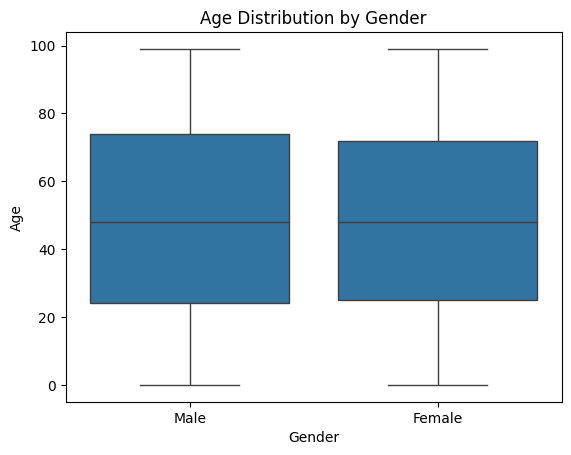

In [ ]:
sns.boxplot(x='Gender', y='Age', data=df)
plt.title('Age Distribution by Gender')
plt.show()

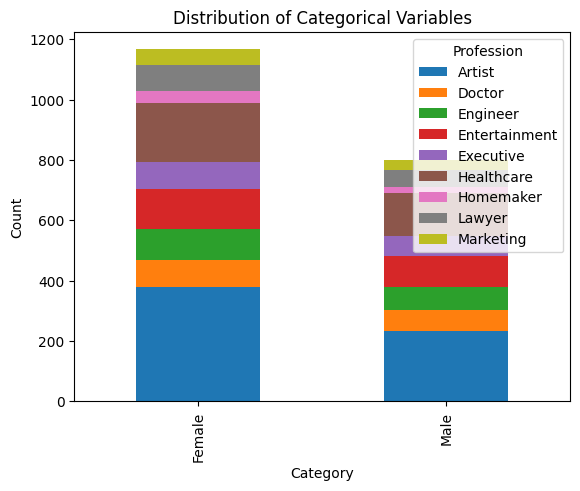

In [ ]:
df.groupby(cat_cols).size().unstack().plot(kind='bar', stacked=True)
plt.title('Distribution of Categorical Variables')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

## Outlier

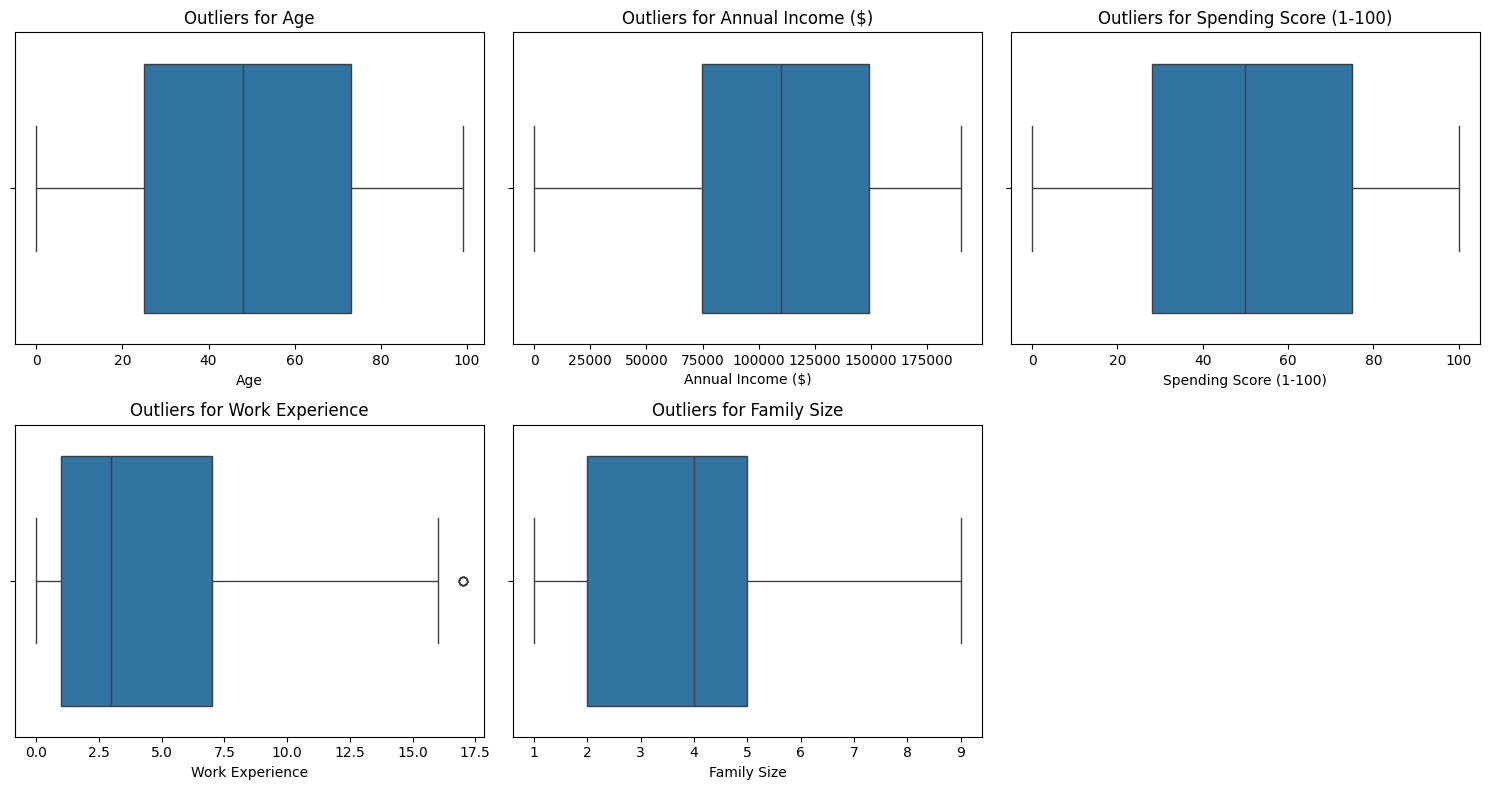

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8)) 
axes = axes.flatten() 

for i, col in enumerate(cols):
    sns.boxplot(x=df[col], ax=axes[i]) 
    axes[i].set_title(f'Outliers for {col}') 

if len(cols) < len(axes):
    axes[-1].set_visible(False)

plt.tight_layout()
plt.show()

## Insight data

#### Calculate `spending` by `family size`

To see if household size affects how people spend money, so we can create better product plans for different types of households

In [52]:
family_size_spending = df.groupby('Family Size')['Spending Score (1-100)'].mean().reset_index()
print(family_size_spending)

   Family Size  Spending Score (1-100)
0            1               49.645485
1            2               50.362881
2            3               51.951768
3            4               52.709343
4            5               52.178295
5            6               49.942387
6            7               49.991453
7            8               49.250000
8            9               17.000000


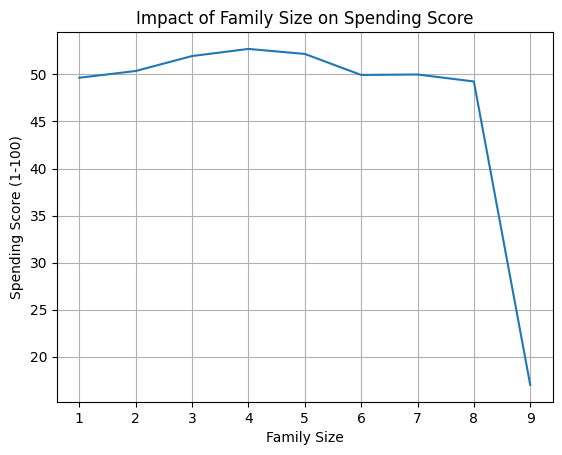

In [54]:
sns.lineplot(x='Family Size', y='Spending Score (1-100)', data=family_size_spending)
plt.grid(True)
plt.title('Impact of Family Size on Spending Score')
plt.show()

#### Average `Income` by `gender`

To understand the differences in spending power between genders, so we can improve marketing and communication campaigns

In [56]:
avg_income_gender = df.groupby('Gender')['Annual Income ($)'].mean()
print("Avg Income by gender:\n", avg_income_gender)

Avg Income by gender:
 Gender
Female    110553.715008
Male      110991.323096
Name: Annual Income ($), dtype: float64


#### check `Spending Score` by `age group`

To find out which age groups spend the most and use that insight to target marketing more effectively

In [58]:
df['Age Group'] = pd.cut(df['Age'], bins=[0, 20, 30, 40, 50, 60, np.inf], labels=['<20', '20-30', '30-40', '40-50', '50-60', '60+'])
avg_spending_age_group = df.groupby('Age Group')['Spending Score (1-100)'].mean()
print("Avg score by age:\n", avg_spending_age_group)

Avg score by age:
 Age Group
<20      53.208877
20-30    52.810427
30-40    49.907173
40-50    49.026738
50-60    49.775120
60+      50.277704
Name: Spending Score (1-100), dtype: float64


<ipython-input-58-e8407bfa6642>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_spending_age_group = df.groupby('Age Group')['Spending Score (1-100)'].mean()


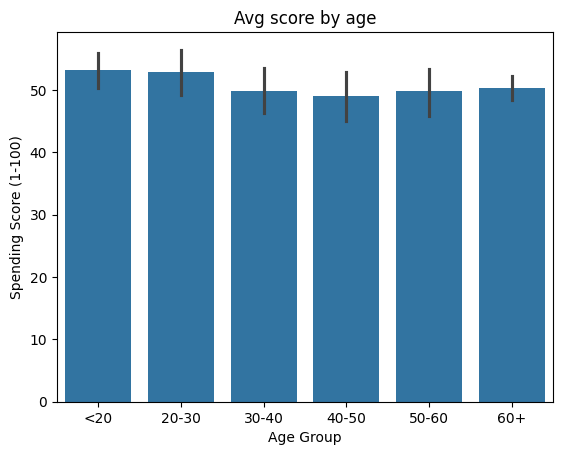

In [59]:
sns.barplot(x='Age Group', y='Spending Score (1-100)', data=df)
plt.title('Avg score by age')
plt.show()

#### Calculate `spending` by `Profession`

To find out which occupations tend to spend the most, so we can target them with specific campaigns

      Profession  Spending Score (1-100)
0         Artist               52.678105
1         Doctor               51.900621
2       Engineer               48.966480
3  Entertainment               52.940171
4      Executive               49.901961
5     Healthcare               50.516224
6      Homemaker               46.383333
7         Lawyer               48.859155
8      Marketing               48.717647


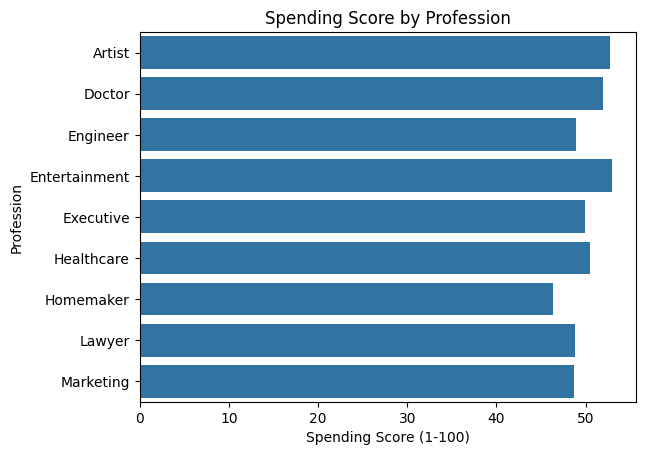

In [60]:
profession_spending = df.groupby('Profession')['Spending Score (1-100)'].mean().reset_index()
print(profession_spending)

# Visualizando
sns.barplot(x='Spending Score (1-100)', y='Profession', data=profession_spending, orient='h')
plt.title('Spending Score by Profession')
plt.show()